Se importan las librerias:
* numpy: Para la manipulación de los arreglos, matrices y operaciones de algebra lineal.
* pandas: Para poder cargar el archivo CSV y manipular el dataframe
* matplotlib: Para la generación gráficos
* sklearn: Para la función MSE

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Importo el CSV con los datos, hago uso de label encoding para convertir las categorías a valores númericos y las variables independientes y dependientes como arreglos.


In [262]:
df = pd.read_csv('./Student_Performance.csv')
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace('Yes', 1).replace('No', 0).astype(int)
X1 = df['Hours Studied'].values
X2 = df['Previous Scores'].values
X3 = df['Extracurricular Activities'].values
X4 = df['Sleep Hours'].values
X5 = df['Sample Question Papers Practiced'].values
Y = df['Performance Index'].values

Las variables con la mayor correlación con `Performance Index` son `Hours Studied` y `Previous Scores`



In [282]:
display(df.corr())

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


Se define la clase para la regresión multilineal. Similar a como funciona la polinomial salvo que aquí no se genera la matriz con el grado, sino que ya se dispone de las variables independientes

In [263]:
class LinearRegression:
  coefficients = None

  def fit(self, X, Y):
    X = np.column_stack((np.ones(X.shape[0]), X))
    self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

  def predict(self, X):
    return np.dot(X, self.coefficients[1:]) + self.coefficients[0]

Entrenamiento del modelo con los valores obtenidos del CSV

In [286]:
X = np.column_stack((X1, X2, X3, X4, X5))
LR = LinearRegression()
LR.fit(X, Y)

print("Coeficientes de la regresión:")
print("Intercept:", LR.coefficients[0])
print("Slope:", LR.coefficients[1:])
Y_pred = LR.predict(X)
print(f'MSE: {mean_squared_error(Y, Y_pred)}')

Coeficientes de la regresión:
Intercept: -34.07558809191334
Slope: [2.85298205 1.01843419 0.61289758 0.48055975 0.19380214]
MSE: 4.151350633946036


Gráfica 3D en base a los campos `Hours Studied` y `Previous Scores` que son los que cuenta con mayor correlación respecto a `Performance Index`.

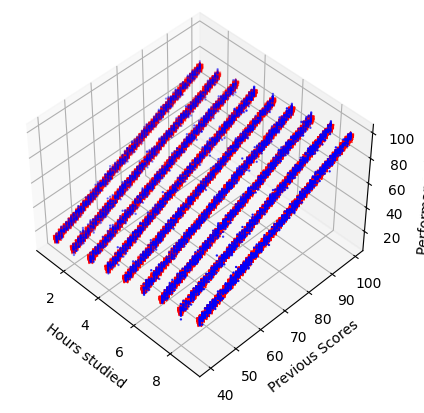

In [266]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, c='b', marker='o', label='Datos de entrenamiento', s=0.5)
ax.scatter(X1, X2, LR.predict(X), c='r', marker='*')
ax.view_init(elev=45, azim=-45)
ax.set_xlabel('Hours studied')
ax.set_ylabel('Previous Scores')
ax.set_zlabel('Performance Index')
plt.show()

Gráfica 2D de `Hours Studied` respecto a `Performance Index`



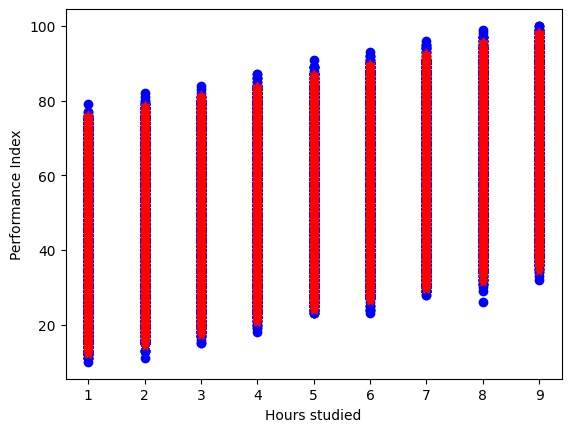

In [287]:
fig = plt.figure()
bx = fig.add_subplot(111)
bx.scatter(X1, Y, c='b', marker='o', label='Datos de entrenamiento')
bx.scatter(X1, LR.predict(X), c='r', marker='*')
bx.set_xlabel('Hours studied')
bx.set_ylabel('Performance Index')
plt.show()

Gráfica 2D de `Previous Scores` respecto a `Performance Index`



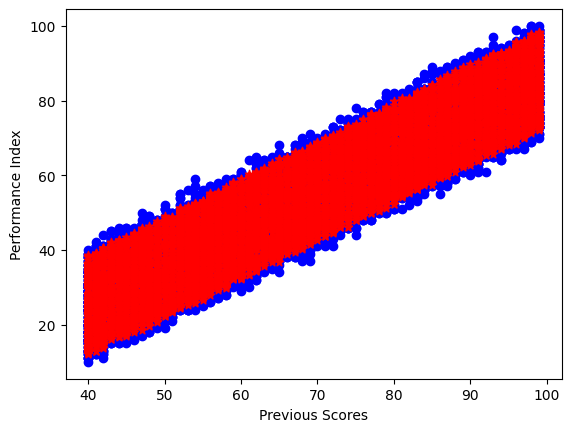

In [278]:
fig = plt.figure()
cx = fig.add_subplot(111)
cx.scatter(X2, Y, c='b', marker='o', label='Datos de entrenamiento')
cx.scatter(X2, LR.predict(X), c='r', marker='*')
cx.set_xlabel('Previous Scores')
cx.set_ylabel('Performance Index')
plt.show()